In [ ]:
# Hritwik Ghosh
# Reg:21bce8973
# VIT-AP University
#Heart Disease Detection: Machine Learning Classification for Identifying Heart Disease

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pycaret pandas shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.7 MB/s eta 0:00:00
   ━━

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
from pycaret.datasets import get_data

In [ ]:
dataset = pd.read_csv("/content/DATASET_1/heart.csv")

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data_train = dataset.sample(frac=0.9, random_state= 786)

In [ ]:
data_train.shape

(922, 14)

In [ ]:
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
995,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
583,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
145,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
498,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [ ]:
data_test = dataset.drop(data_train.index)

In [ ]:
data_test.shape

(103, 14)

In [ ]:
data_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
17,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
1,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
2,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
3,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
4,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
1,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
2,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
3,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
4,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [ ]:
from pycaret.classification import *

In [ ]:
mclf = setup(data=data_train,
            target = "target", session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(922, 14)"
4,Transformed data shape,"(922, 14)"
5,Transformed train set shape,"(645, 14)"
6,Transformed test set shape,"(277, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9690,0.9972,0.9610,0.9794,0.9695,0.9380,0.9393,0.1510
et,Extra Trees Classifier,0.9659,0.9990,0.9581,0.9767,0.9666,0.9317,0.9333,0.0940
xgboost,Extreme Gradient Boosting,0.9658,0.9911,0.9548,0.9794,0.9663,0.9317,0.9331,0.0430
lightgbm,Light Gradient Boosting Machine,0.9658,0.9926,0.9520,0.9819,0.9662,0.9317,0.9331,11.9370
catboost,CatBoost Classifier,0.9658,0.9944,0.9581,0.9770,0.9666,0.9317,0.9336,0.9470
dt,Decision Tree Classifier,0.9628,0.9632,0.9520,0.9765,0.9635,0.9256,0.9272,0.0150
gbc,Gradient Boosting Classifier,0.9426,0.9791,0.9340,0.9545,0.9433,0.8852,0.8868,0.0820
ada,Ada Boost Classifier,0.8728,0.9489,0.8799,0.8756,0.8769,0.7453,0.7468,0.0670
lr,Logistic Regression,0.8481,0.9255,0.8955,0.8256,0.8582,0.6952,0.7003,0.7720
ridge,Ridge Classifier,0.8419,0.9250,0.9162,0.8055,0.8566,0.6818,0.6907,0.0190


In [ ]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9385,0.9384,0.9394,0.9394,0.9394,0.8769,0.8769
2,0.9846,0.9853,0.9706,1.0000,0.9851,0.9692,0.9697
3,0.9385,0.9412,0.8824,1.0000,0.9375,0.8774,0.8840
4,0.9385,0.9369,0.9706,0.9167,0.9429,0.8763,0.8780
5,0.9844,0.9839,1.0000,0.9706,0.9851,0.9687,0.9692
6,0.9531,0.9545,0.9091,1.0000,0.9524,0.9064,0.9104
7,0.9688,0.9697,0.9394,1.0000,0.9688,0.9376,0.9394
8,0.9531,0.9536,0.9394,0.9688,0.9538,0.9062,0.9067


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [ ]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7231,0.7831,0.7576,0.7143,0.7353,0.4455,0.4463
1,0.6923,0.8158,0.7273,0.6857,0.7059,0.3839,0.3846
2,0.7231,0.8193,0.6471,0.7857,0.7097,0.4497,0.4574
3,0.6462,0.7234,0.5882,0.6897,0.6349,0.2958,0.2993
4,0.7231,0.7989,0.7647,0.7222,0.7429,0.4434,0.4442
5,0.6719,0.8016,0.7273,0.6667,0.6957,0.3412,0.3427
6,0.6562,0.7576,0.6667,0.6667,0.6667,0.3118,0.3118
7,0.6406,0.7957,0.7879,0.6190,0.6933,0.2742,0.2859
8,0.7031,0.8157,0.7273,0.7059,0.7164,0.4051,0.4053


In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9583,1.0000,0.8684,0.9296,0.8458,0.8560
1,0.8462,0.9441,0.8788,0.8286,0.8529,0.6919,0.6933
2,0.8154,0.9507,0.8235,0.8235,0.8235,0.6300,0.6300
3,0.7692,0.8444,0.7941,0.7714,0.7826,0.5368,0.5371
4,0.8462,0.9393,0.8824,0.8333,0.8571,0.6908,0.6921
5,0.8125,0.8553,0.8788,0.7838,0.8286,0.6232,0.6281
6,0.8594,0.9238,0.8788,0.8529,0.8657,0.7182,0.7186
7,0.8906,0.9668,1.0000,0.8250,0.9041,0.7795,0.7992
8,0.8438,0.9218,0.8485,0.8485,0.8485,0.6872,0.6872


In [ ]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9896,0.9091,0.9375,0.9231,0.8462,0.8466
1,0.8769,0.9427,0.8182,0.9310,0.8710,0.7543,0.7600
2,0.8923,0.9801,0.8824,0.9091,0.8955,0.7845,0.7848
3,0.9846,0.9972,1.0000,0.9714,0.9855,0.9691,0.9696
4,0.8615,0.9170,0.8529,0.8788,0.8657,0.7229,0.7232
5,0.9062,0.9800,0.8788,0.9355,0.9062,0.8127,0.8143
6,0.9062,0.9526,0.9394,0.8857,0.9118,0.8119,0.8135
7,0.9531,0.9721,0.9091,1.0000,0.9524,0.9064,0.9104
8,0.8594,0.9296,0.8182,0.9000,0.8571,0.7193,0.7225


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


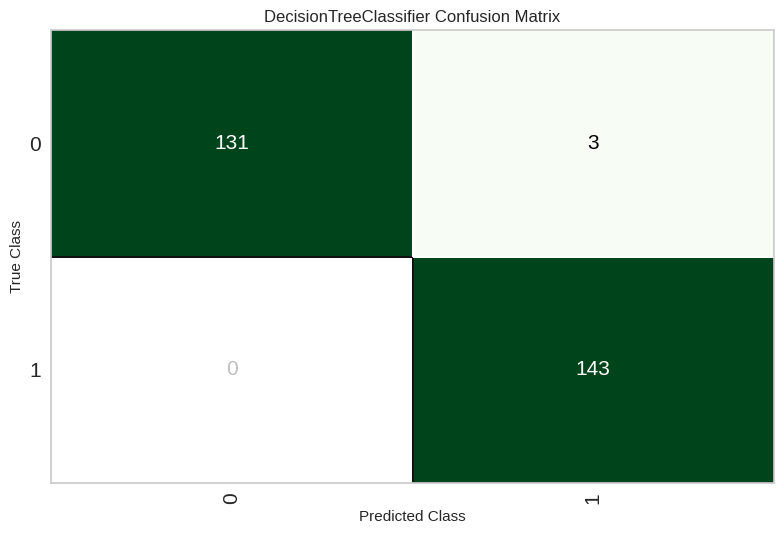

In [ ]:
plot_model(tuned_dt, plot= "confusion_matrix")

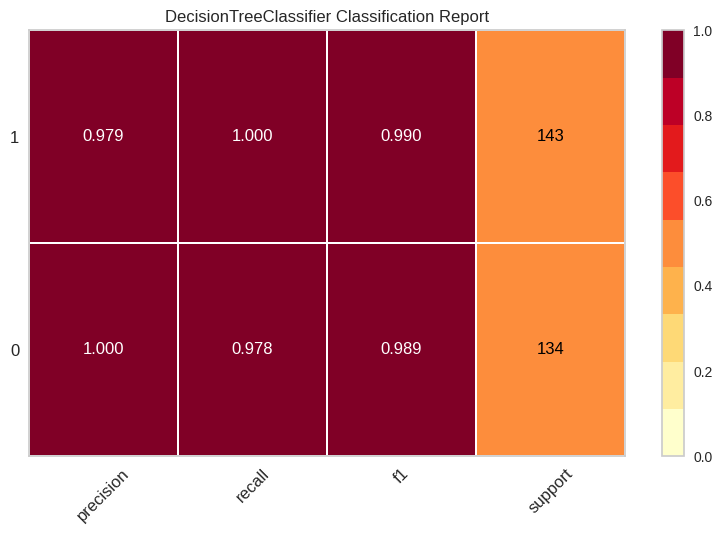

In [ ]:
plot_model(tuned_dt, plot= "class_report")

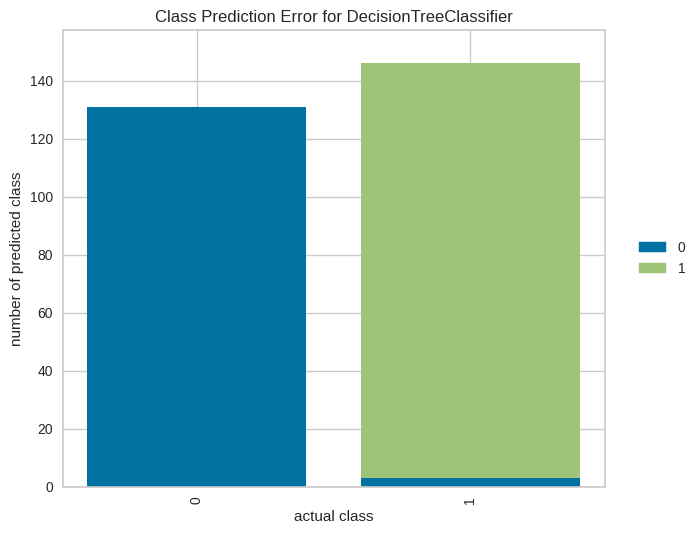

In [ ]:
plot_model(tuned_dt, plot= "error")

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_dt = finalize_model(tuned_dt)

In [ ]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categ...
                                                              mis

In [ ]:
test_pred = predict_model(final_dt, data= data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
test_pred.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
0,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,1.0
1,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1.0
2,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0,0,1.0
3,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1,1,1.0
4,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,1,1.0


In [ ]:
save_model(final_dt, "final dt")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categ...
                                                   

In [ ]:
dt_new= load_model("final dt")

Transformation Pipeline and Model Successfully Loaded
